In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3D algorithms

#### Generating random data

In [19]:
# First, we should declare a variable containing the size of the training set we want to generate.
observations = 1000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations x 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions.сх of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two matrices (vectors) into one.
inputs = np.column_stack((xs,zs)) #it stacks data into matrix shape

# Check if the dimensions of the inputs are the same as the ones we defined in the linear model lectures. 
# They should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.
inputs.shape

(1000, 2)

In [20]:
noise = np.random.uniform(-1,1,(observations,1))

# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
targets = 2*xs - 3*zs + 5 + noise
targets.shape

(1000, 1)

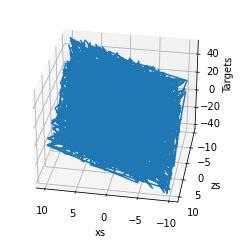

In [21]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
# Use azim parameter to plot the data from different angles.
ax.view_init(azim=100)
plt.show()
# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot.
targets = targets.reshape(observations,1)

In [22]:
# We will initialize the weights and biases randomly in some small initial range.
# init_range is the variable that will measure that.
# You can play around with the initial range, but we don't really encourage you to do so.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(-init_range, init_range, (2,1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(-init_range, init_range, 1)

weights, biases

(array([[0.01519019],
        [0.01728892]]),
 array([-0.05252926]))

In [23]:
learning_rate = 0.02

### Training the model

In [24]:
# We iterate over our training dataset 100 times. That works well with a learning rate of 0.02.
# Generally a lower learning rate would need more iterations, while a higher learning rate would need less iterations
# High learning rate may cause the loss to diverge to infinity, instead of converge to 0.

for i in range(100):
    # This is the linear model: y = xw + b equation
    outputs = np.dot(inputs,weights) + biases
    
    # The deltas are the differences between the outputs and the targets (in here vector 1000 x 1)
    deltas = outputs - targets
    
    # We are considering the L2-norm loss, but divided by 2. Moreover, we further divide it by the number of observations.
    # This is simple rescaling by a constant. 
    loss = np.sum(deltas**2)/2/observations
    print(loss)
    
    # Another small trick is to scale the deltas the same way as the loss function
    # In this way our learning rate is independent of the number of samples (observations).
    deltas_scaled = deltas/observations
    
    # We must apply the gradient descent update rules.
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # We must transpose the inputs so that we get an allowed operation.
    weights = weights - learning_rate*np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate*np.sum(deltas_scaled)
    
    # The weights are updated in a linear algebraic way (a matrix minus another matrix)
    # The biases, however, are just a single number here, so we must transform the deltas into a scalar.
    # The two lines are both consistent with the gradient descent methodology. 

231.4312855961309
36.59349708260553
14.692739176229283
11.86117320187731
11.149433123839781
10.687555016731872
10.268454549363316
9.868646212696747
9.48495629906945
9.116480286969818
8.762586690204799
8.422695281851786
8.096251703084866
7.78272385102362
7.481600711205841
7.192391491399282
6.914624817979324
6.6478479672410105
6.39162612747253
6.1455416902633955
5.909193569856252
5.682196549429009
5.46418065324129
5.254790543621905
5.053684941814472
4.860536071737247
4.67502912575058
4.496861751561219
4.325743559427255
4.161395648860447
4.003550154054555
3.8519498072987646
3.7063475196646576
3.5665059782832573
3.4321972595557746
3.3032024576676986
3.179311327800642
3.060321943460539
2.9460403673636084
2.8362803353437016
2.730862952765844
2.629616402951145
2.532375667137866
2.438982255522229
2.349283948940544
2.2631345507717042
2.1803936486556244
2.1009263856392852
2.024603240377359
1.9512998160292054
1.8808966375081326
1.8132789567524692
1.7483365657011045
1.6859636166686087
1.6260584498

#### Weights and biases

In [25]:
# We print the weights and the biases, so we can see if they have converged to what we wanted.
# When declared the targets, following the f(x,z), we knew the weights should be 2 and -3, while the bias: 5.
# Note that they may be convergING. So more iterations are needed.
weights, biases

(array([[ 1.99321796],
        [-3.00327981]]),
 array([4.35226457]))

#### We can run the code again to get another 100 iteration. I will copy and paste the code from cells above to make it more visible.

In [26]:
for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    
    loss = np.sum(deltas**2)/2/observations
    print(loss)
    
    deltas_scaled = deltas/observations
    weights = weights - learning_rate*np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate*np.sum(deltas_scaled)

0.39893134433686855
0.38994753635884094
0.3813191722339651
0.3730321888463494
0.3650730794864859
0.3574288718370599
0.350087106829758
0.343035818338596
0.3362635136766871
0.3297591548646495
0.3235121406401287
0.31751228917911317
0.311749821500884
0.3062153455295371
0.30089984078612003
0.29579464368641784
0.290891433420434
0.2861822183905482
0.28165932318624676
0.2773153760741956
0.2731432969832753
0.26913628596497574
0.26528781211036595
0.26159160290555505
0.25804163400830954
0.25463211942915404
0.2513575021009593
0.24821244482164131
0.24519182155521396
0.24229070907701392
0.23950437894948345
0.23682828981542714
0.2342580799961907
0.23178956038268866
0.22941870760769728
0.22714165748829068
0.22495469872771975
0.22285426686648163
0.2208369384727119
0.2188994255624327
0.21703857024056705
0.2152513395539756
0.2135348205481405
0.21188621551942188
0.2103028374551675
0.20878210565422725
0.20732154152074617
0.20591876452437305
0.2045714883203056
0.20327751702284402
0.20203474162638183
0.20084

In [27]:
weights, biases

(array([[ 1.99527676],
        [-3.00105382]]),
 array([4.93687519]))

#### Now we can plot outputs vs targets

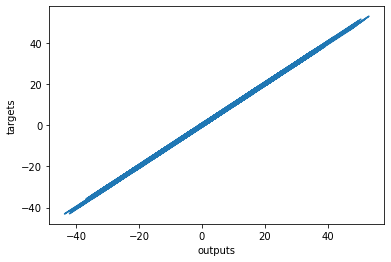

In [28]:
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show();

#### The closer this plot is to the 45 degree line the closer are the outputs to the targets